# Relative Strength Indicator

In [5]:
import pandas as pd

df = pd.read_json("../../data/example00593.json", orient='series')
df = df.set_index('date')
s_data = df.tail(360)

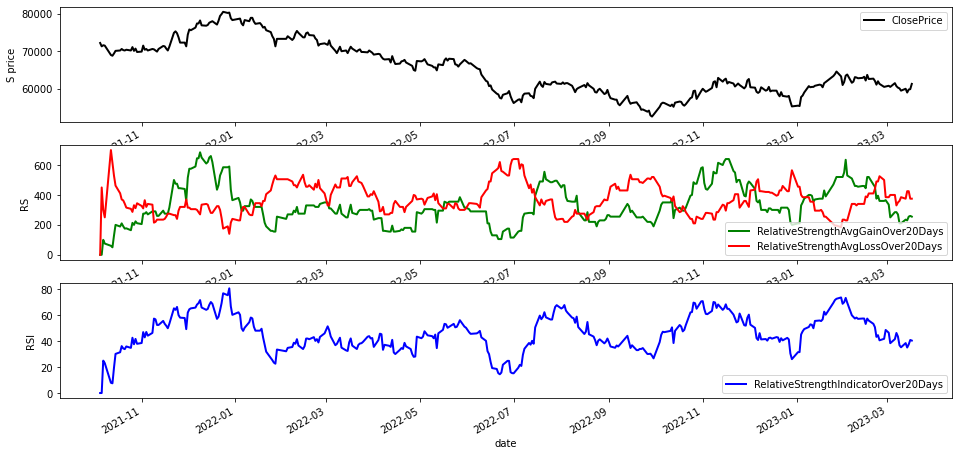

In [9]:
import statistics as stats

time_period = 20

gain_history = []
loss_history = []

avg_gain_values = []
avg_loss_values = []

rsi_values = []
last_price = 0

close = s_data['close']

for close_price in close:
    if last_price == 0:
        last_price = close_price
    gain_history.append(max(0, close_price - last_price))
    loss_history.append(max(0, last_price - close_price))
    last_price = close_price
    
    if len(gain_history) > time_period:
        del (gain_history[0])
        del (loss_history[0])

    avg_gain = stats.mean(gain_history)
    avg_loss = stats.mean(loss_history)
    avg_gain_values.append(avg_gain)
    avg_loss_values.append(avg_loss)

    rs = 0
    if avg_loss > 0:
        rs = avg_gain /avg_loss
    rsi = 100 - (100 / (1 + rs))
    rsi_values.append(rsi)

s_data = s_data.assign(ClosePrice=pd.Series(close, index=s_data.index))
s_data = s_data.assign(RelativeStrengthAvgGainOver20Days=pd.Series(avg_gain_values, index=s_data.index))
s_data = s_data.assign(RelativeStrengthAvgLossOver20Days=pd.Series(avg_loss_values, index=s_data.index))
s_data = s_data.assign(RelativeStrengthIndicatorOver20Days=pd.Series(rsi_values, index=s_data.index))


close_price = s_data['ClosePrice']
rs_gain = s_data['RelativeStrengthAvgGainOver20Days']
rs_loss = s_data['RelativeStrengthAvgLossOver20Days']
rsi = s_data['RelativeStrengthIndicatorOver20Days']

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(311, ylabel='S price')
close_price.plot(ax=ax1, color='black', lw=2., legend=True)
ax2 = fig.add_subplot(312, ylabel='RS')
rs_gain.plot(ax=ax2, color='g', lw=2., legend=True)
rs_loss.plot(ax=ax2, color='r', lw=2., legend=True)
ax3 = fig.add_subplot(313, ylabel='RSI')
rsi.plot(ax=ax3, color='b', lw=2., legend=True)
plt.show() 

# stddev

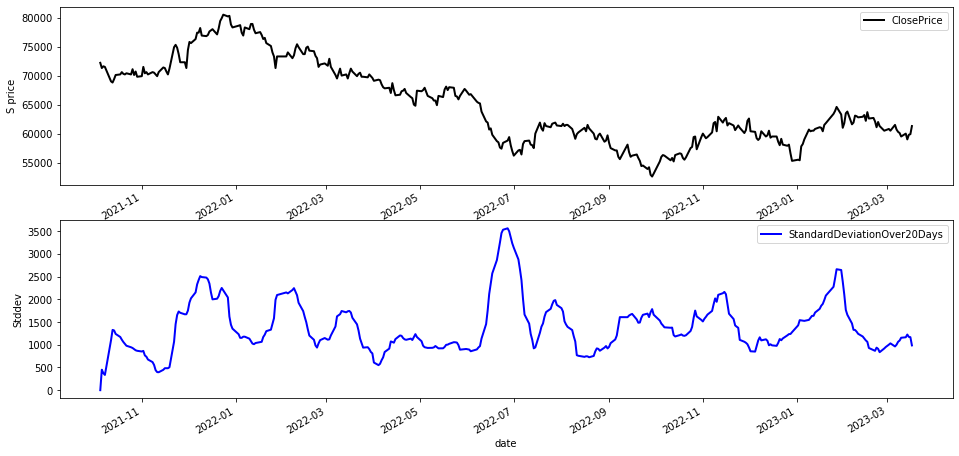

In [11]:
import statistics as stats
import math as math

time_period = 20

history = []
sma_values = []
stddev_values = []

for close_price in close:
    history.append(close_price)
    if len(history) > time_period:
        del (history[0])
    sma = stats.mean(history)
    sma_values.append(sma)
    
    variance = 0
    for hist_price in history:
        variance = variance + ((hist_price - sma) ** 2)
    stdev = math.sqrt(variance / len(history))
    stddev_values.append(stdev)

s_data = s_data.assign(ClosePrice=pd.Series(close, index=s_data.index))
s_data = s_data.assign(StandardDeviationOver20Days=pd.Series(stddev_values, index=s_data.index))

close_price = s_data['ClosePrice']
stddev = s_data['StandardDeviationOver20Days']

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(211, ylabel='S price')
close_price.plot(ax=ax1, color='black', lw=2., legend=True)
ax2 = fig.add_subplot(212, ylabel='Stddev')
stddev.plot(ax=ax2, color='b', lw=2., legend=True)
plt.show()

# Momentum

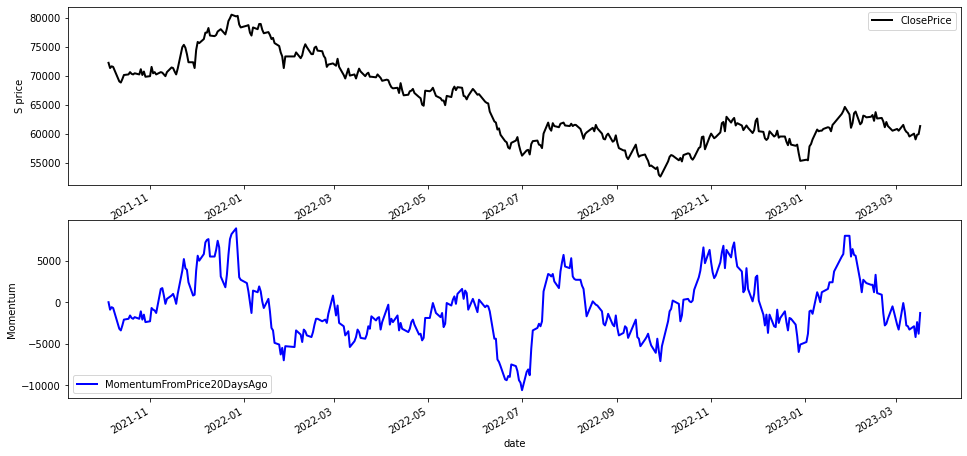

In [13]:
time_period = 20

history = []
mom_values = []

for close_price in close:
    history.append(close_price)
    if len(history) > time_period:
        del (history[0])
    mom = close_price - history[0]
    mom_values.append(mom)

s_data = s_data.assign(ClosePrice=pd.Series(close, index=s_data.index))
s_data = s_data.assign(MomentumFromPrice20DaysAgo=pd.Series(mom_values, index=s_data.index))

close_price = s_data['ClosePrice']
mom = s_data['MomentumFromPrice20DaysAgo']

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16, 8))
ax1 = fig.add_subplot(211, ylabel='S price')
close_price.plot(ax=ax1, color='black', lw=2., legend=True)
ax2 = fig.add_subplot(212, ylabel='Momentum')
mom.plot(ax=ax2, color='b', lw=2., legend=True)
plt.show()